In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [2]:
df = pd.read_csv(r'D:\Dataset\Malware dataset.csv')
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [3]:
#label encode
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
label_encoder = LabelEncoder()

# Apply label encoding to 'hash' and 'classification' columns
df['hash'] = label_encoder.fit_transform(df['hash'])
df['classification'] = label_encoder.fit_transform(df['classification'])

# Check the DataFrame after label encoding
print(df)


       hash  millisecond  classification  state  usage_counter        prio  \
0        30            0               1      0              0  3069378560   
1        30            1               1      0              0  3069378560   
2        30            2               1      0              0  3069378560   
3        30            3               1      0              0  3069378560   
4        30            4               1      0              0  3069378560   
...     ...          ...             ...    ...            ...         ...   
99995     1          995               1   4096              0  3070148608   
99996     1          996               1   4096              0  3070148608   
99997     1          997               1   4096              0  3070148608   
99998     1          998               1   4096              0  3070148608   
99999     1          999               1   4096              0  3070148608   

       static_prio  normal_prio  policy  vm_pgoff  ...  nivcsw 

In [4]:
df.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [5]:
import pandas as pd

# Assuming df is your DataFrame
# Replace NaN values with the mean of each column
df_filled = df.fillna(df.mean())

# Check the DataFrame after filling null values
print(df_filled)


       hash  millisecond  classification  state  usage_counter        prio  \
0        30            0               1      0              0  3069378560   
1        30            1               1      0              0  3069378560   
2        30            2               1      0              0  3069378560   
3        30            3               1      0              0  3069378560   
4        30            4               1      0              0  3069378560   
...     ...          ...             ...    ...            ...         ...   
99995     1          995               1   4096              0  3070148608   
99996     1          996               1   4096              0  3070148608   
99997     1          997               1   4096              0  3070148608   
99998     1          998               1   4096              0  3070148608   
99999     1          999               1   4096              0  3070148608   

       static_prio  normal_prio  policy  vm_pgoff  ...  nivcsw 

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming df is your DataFrame and y is your target variable
X = df.drop(columns=['classification'])  # Drop the target variable if it's in the DataFrame
y = df['classification']

# Select the top 10 features based on ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = k_best.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[k_best.get_support()]

# Create a DataFrame with the selected features
df_selected = pd.DataFrame(data=X_selected, columns=selected_feature_names)

# Add back the target variable if necessary
df_selected['classification'] = y

# Check the DataFrame with reduced features
print(df_selected)


       hash  static_prio  vm_truncate_count  map_count  shared_vm  exec_vm  \
0        30        14274              13173       6850        120      124   
1        30        14274              13173       6850        120      124   
2        30        14274              13173       6850        120      124   
3        30        14274              13173       6850        120      124   
4        30        14274              13173       6850        120      124   
...     ...          ...                ...        ...        ...      ...   
99995     1        13988              10406       3651        120       97   
99996     1        13988              10406       3651        120       97   
99997     1        13988              10406       3651        120       97   
99998     1        13988              10406       3651        120       97   
99999     1        13988              10406       3651        120       97   

       end_data   nvcsw  maj_flt   utime  classification  
0   

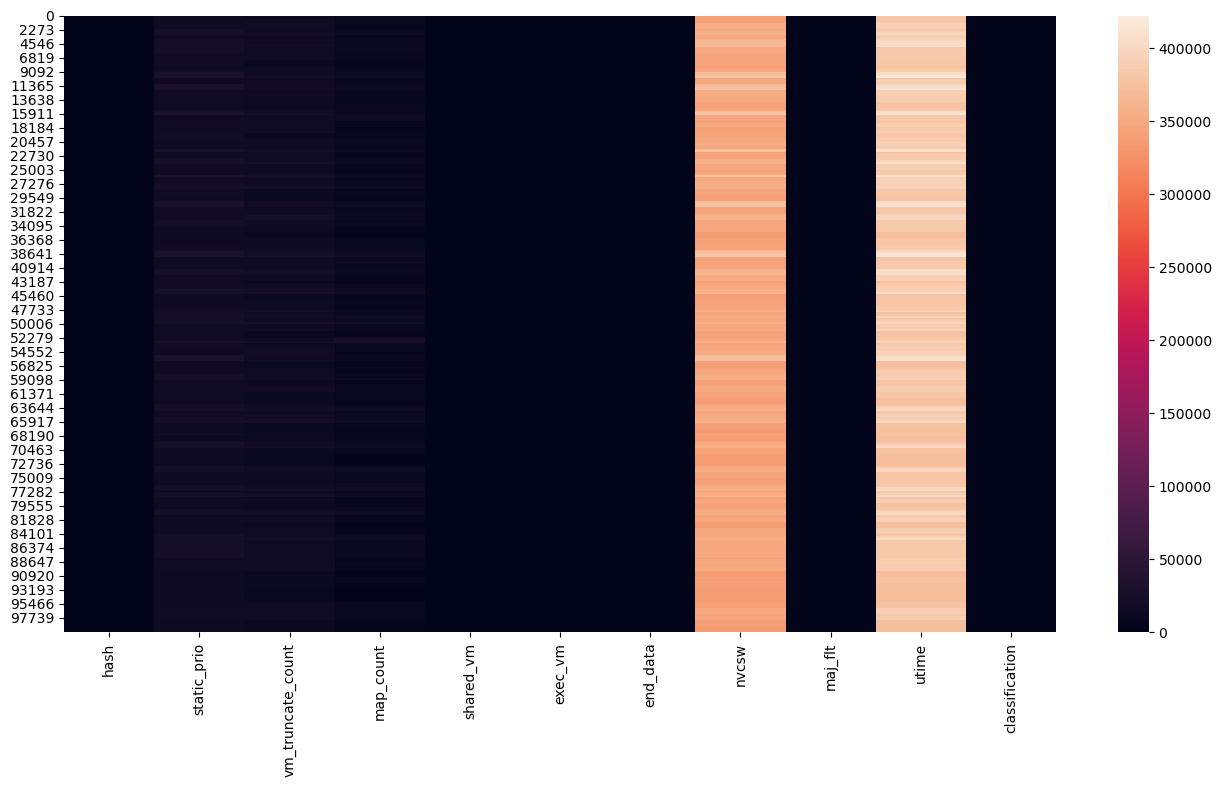

In [7]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df_selected)
plt.show()

# Assuming df_selected is your DataFrame with reduced features
df_sample = df_selected.sample(frac=0.2, random_state=42)  # Adjust fraction as needed

# Create dendrogram using the sampled DataFrame
plt.figure(1, figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(df_sample, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [8]:
# Assuming df_selected is your DataFrame with reduced features
df_subset_features = df_selected.iloc[:, :5]  # Use the first 5 features (adjust as needed)

# Create dendrogram using the subset of features
plt.figure(1, figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(df_subset_features, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


MemoryError: Unable to allocate 37.3 GiB for an array with shape (4999950000,) and data type float64

<Figure size 1600x800 with 0 Axes>